In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [67]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [68]:
df = pd.read_csv('/content/drive/MyDrive/Data/fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


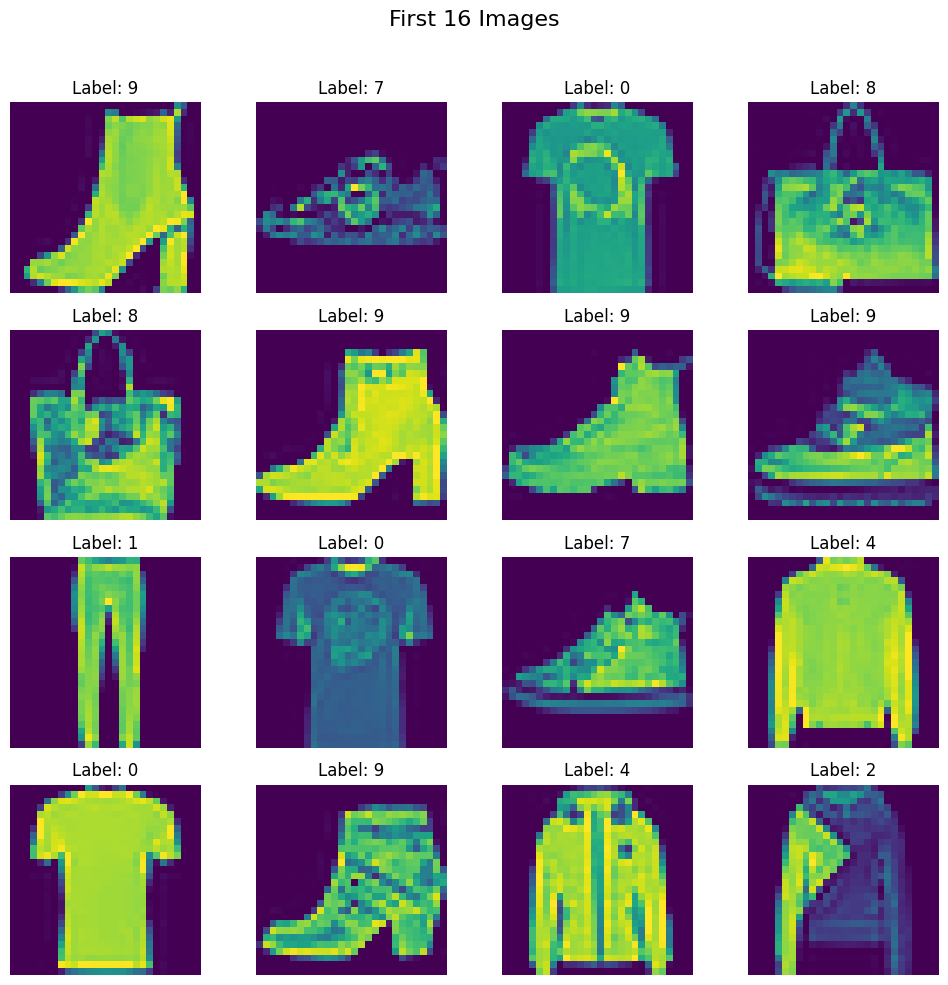

In [69]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [70]:
# X = df.drop('label', axis = 1)
# y = df['label']

X = df.iloc[:, 1:].values
y = df.iloc[:,0].values


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [72]:
# scaling the features
X_train = X_train/255.0
X_test = X_test/255.0

In [73]:
# Create CustomDataset Class

class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [74]:
## create an train_dataset object
train_dataset = CustomDataset(X_train, y_train)

In [75]:
# create an test_dataset object
test_dataset = CustomDataset(X_test, y_test)

In [76]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [77]:
 test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [78]:
## train test loader

train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle= False  )

## out nn model structure
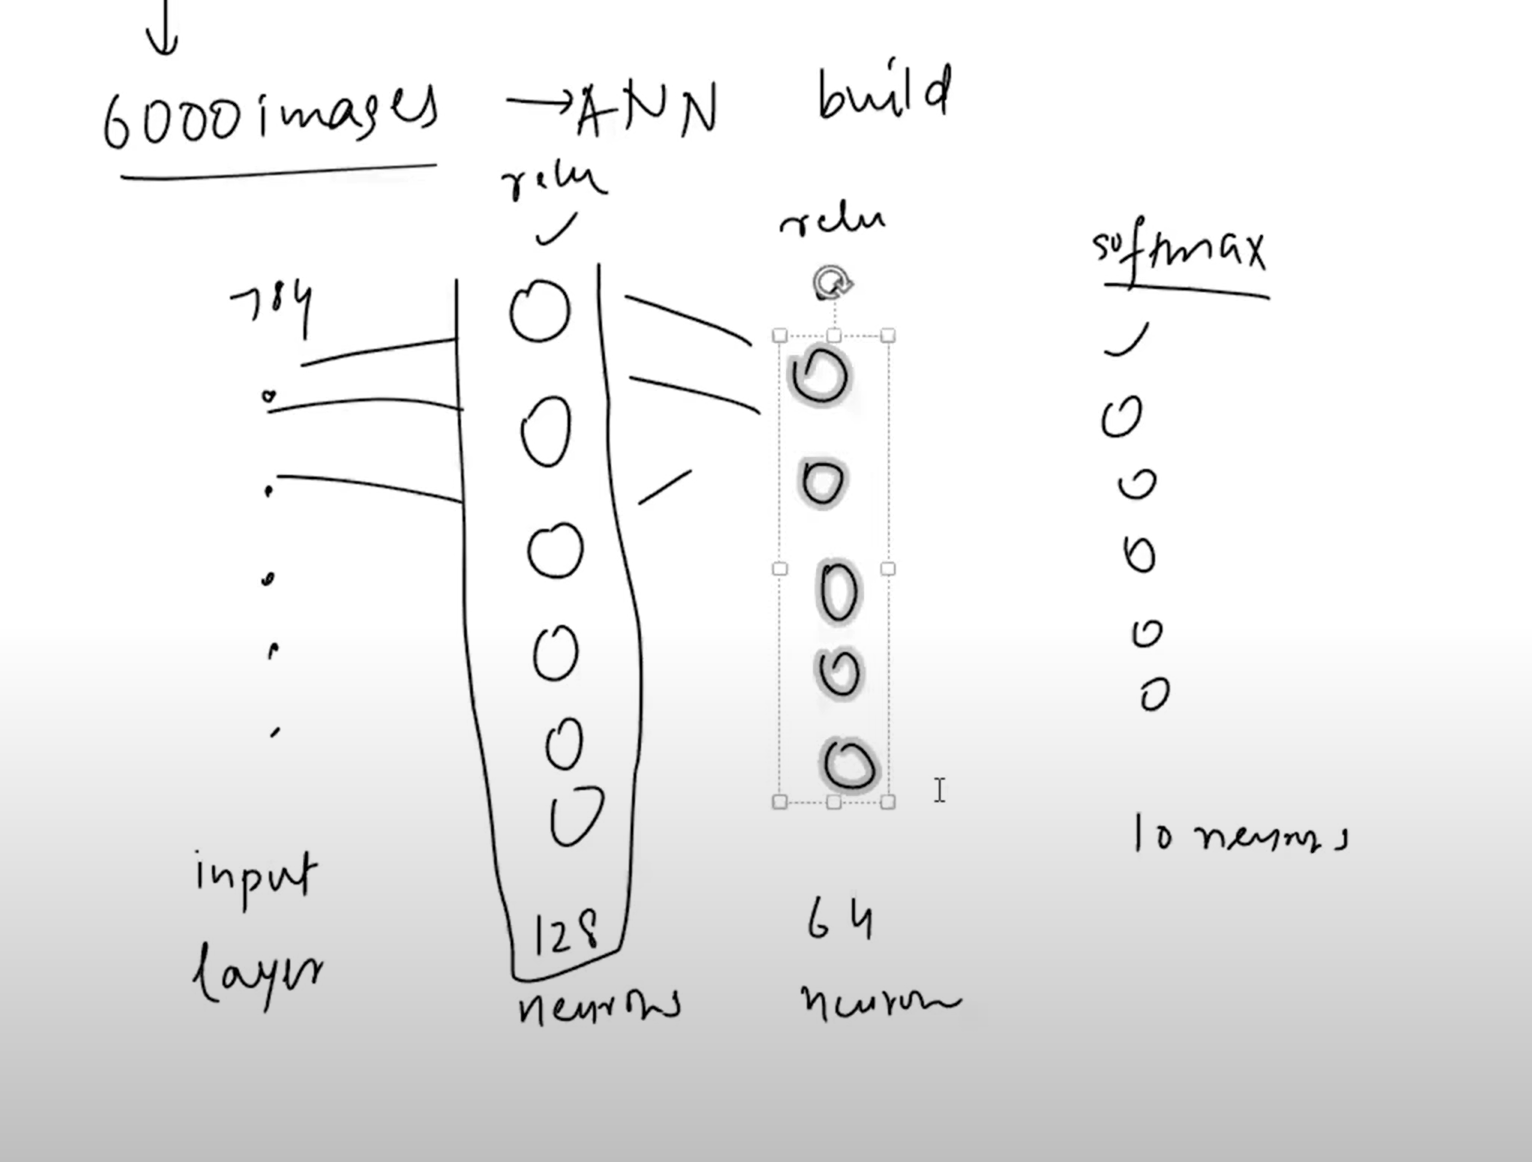

In [79]:
## define NN class

class myNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64, 10)

    )

  def forward(self, x):
    return self.model(x)

In [89]:
## epochs and learning rate

epochs = 100
learning_rate = 0.05

In [81]:
## create model instance
model = myNN(X_train.shape[1])

# loss function
criterian = nn.CrossEntropyLoss()

# optimizer

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [90]:
# training loop

for epoch in range(epochs):
  total_epoch_loss = 0

  for batch_features, batch_labels in train_dataloader:

    # froword pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterian(outputs, batch_labels)

    # backword propogation
    optimizer.zero_grad()
    loss.backward()

    # weights, bias updates grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()
    avg_loss = total_epoch_loss/len(train_dataloader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Streaming output truncated to the last 5000 lines.
Epoch: 67 , Loss: 0.020675272106503446
Epoch: 67 , Loss: 0.020724235475063323
Epoch: 67 , Loss: 0.021008410801490147
Epoch: 67 , Loss: 0.021046414139370122
Epoch: 67 , Loss: 0.021149008851498365
Epoch: 67 , Loss: 0.021600302637865144
Epoch: 67 , Loss: 0.021831394291172423
Epoch: 67 , Loss: 0.021957725280274946
Epoch: 67 , Loss: 0.022032201333592336
Epoch: 67 , Loss: 0.022164877348889906
Epoch: 67 , Loss: 0.02249073705946406
Epoch: 67 , Loss: 0.02264875113343199
Epoch: 67 , Loss: 0.02285478570188085
Epoch: 67 , Loss: 0.022936358656734226
Epoch: 67 , Loss: 0.02318747059131662
Epoch: 67 , Loss: 0.02331208175048232
Epoch: 67 , Loss: 0.023439441056301195
Epoch: 67 , Loss: 0.023490120070055128
Epoch: 67 , Loss: 0.023693322573478025
Epoch: 67 , Loss: 0.023820106148098905
Epoch: 67 , Loss: 0.023980129742994905
Epoch: 67 , Loss: 0.02407935376279056
Epoch: 67 , Loss: 0.024282590352619687
Epoch: 67 , Loss: 0.02437881538333992
Epoch: 67 , Loss: 0.

In [85]:
# model eval

model.eval()

myNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [86]:
len(test_dataloader)

38

In [91]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_dataloader:
    output = model(batch_features)

    _, predicted = torch.max(output, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.825
